In [0]:
!pip install --upgrade tables
!pip install eli5

     |████████████████████████████████| 4.3MB 4.6MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 4.8MB/s 


In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

## wczytywanie danych

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/matrix/matrix_two/dw_matrix_car


In [0]:
df = pd.read_hdf('data/car.h5')

In [0]:
df.shape

(106494, 155)

In [0]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

## Dummy Model

In [0]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [0]:
feats=['car_id']
x=df[feats].values
y=df['price_value'].values

In [0]:
model=DummyRegressor()
model.fit(x,y)
y_pred=model.predict(x)
mae(y,y_pred)

39465.934630440985

In [0]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [0]:
df=df[df['price_currency'] != 'EUR']

In [0]:
df.shape

(106290, 155)

## Features

In [0]:
for feat in df.columns:
  print(feat)

breadcrumb
created_at
price_currency
price_details
price_value
seller_address
seller_name
seller_type
feature_czujniki-parkowania-przednie
feature_poduszka-powietrzna-chroniąca-kolana
feature_kurtyny-powietrzne
feature_klimatyzacja-dwustrefowa
feature_światła-led
feature_czujnik-zmierzchu
feature_elektrycznie-ustawiane-lusterka
feature_asr-(kontrola-trakcji)
feature_poduszka-powietrzna-kierowcy
feature_cd
feature_elektryczne-szyby-przednie
feature_poduszka-powietrzna-pasażera
feature_system-start-stop
feature_światła-do-jazdy-dziennej
feature_komputer-pokładowy
feature_elektryczne-szyby-tylne
feature_klimatyzacja-manualna
feature_tapicerka-welurowa
feature_czujnik-deszczu
feature_światła-przeciwmgielne
feature_ogrzewanie-postojowe
feature_radio-niefabryczne
feature_regulowane-zawieszenie
feature_ogranicznik-prędkości
feature_zmieniarka-cd
feature_szyberdach
feature_isofix
feature_asystent-pasa-ruchu
feature_alufelgi
feature_bluetooth
feature_nawigacja-gps
feature_asystent-parkowania
fe

In [0]:
df['param_color'].factorize()

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFFIX_CAT='_cat'
for feat in df.columns:
  if isinstance(df[feat][0],list):continue

  factorized_values=df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat]=factorized_values
  else:
    df[feat + SUFFIX_CAT]=factorized_values


In [0]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]
len(cat_feats)

151

In [0]:
x=df[cat_feats].values
y=df['price_value'].values

model=DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model,x,y,cv=3,scoring='neg_mean_absolute_error')
np.mean(scores)

-19566.588937368324

In [0]:
m=DecisionTreeRegressor(max_depth=5)
m.fit(x,y)

imp = PermutationImportance(m, random_state=0).fit(x,y)
eli5.show_weights(imp,feature_names=cat_feats)

Weight,Feature
0.2533 ± 0.0040,param_napęd_cat
0.2008 ± 0.0047,param_faktura-vat_cat
0.1943 ± 0.0088,param_stan_cat
0.1423 ± 0.0086,param_rok-produkcji_cat
0.0629 ± 0.0047,param_moc_cat
0.0424 ± 0.0014,feature_kamera-cofania_cat
0.0412 ± 0.0008,param_skrzynia-biegów_cat
0.0286 ± 0.0037,param_marka-pojazdu_cat
0.0191 ± 0.0022,param_pojemność-skokowa_cat
0.0163 ± 0.0005,feature_bluetooth_cat


In [0]:
def group_and_barplot(feat_groupby,feat_agg='price_value',agg_feats=[np.mean,np.median,np.size],sort_feat='mean',top=50,subplots=True):
 (
  df
  .groupby(feat_groupby)[feat_agg]
  .agg(agg_feats)
  .sort_values(by=sort_feat,ascending=False)
  .head(top)
  .plot(kind='bar',figsize=(15,5),subplots=subplots)
 )

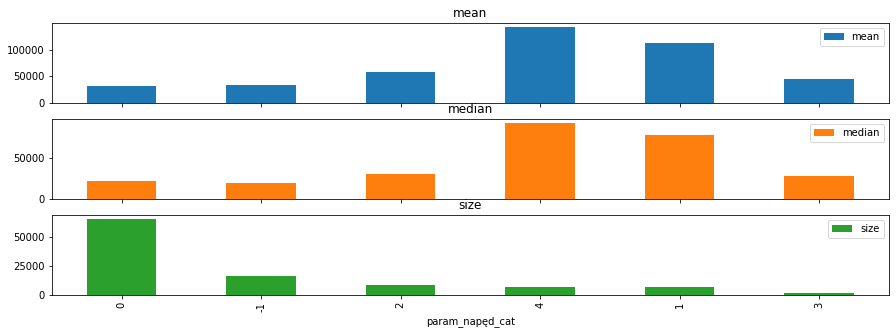

In [62]:
group_and_barplot('param_napęd_cat',sort_feat='size')

In [0]:
!git config --global user.email "jedrzejczak.wa@gmail.com"
!git config --global user.name "Wieslaw"

### Wrzucić plik do odpowieniego folderu na drive (taki jak w pwd)

In [0]:
!git add day3_simple_model.ipynb
!git commit -m "add simple ml model"

[master f724839] add simple ml model
 1 file changed, 1 insertion(+)
 create mode 100644 day3_simple_model.ipynb


In [0]:
!git push -u origin master

Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 5.94 KiB | 1.98 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/Wieslaw-J/dw_matrix_car.git
   e9b1a1b..f724839  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
